# Convolutional Neural Network (CNN)

Instructions:
- Start the kernel: In the menu bar, select Kernel -> Restart kernel.
- Complete all sections with the comment `YOUR CODE HERE`.
- Run all code blocks to check the implementation: In the menu bar, select Cell -> Run All.

In this exercise, we will proceed to implement one of the first `CNN` networks, which is LeNet. The architecture of the LeNet network can be summarized as follows:

![](LeNet.png)

In the given figure, the architecture of the model is summarized as follows:

**1. Input Layer**: This layer represents the input images to the network.
- The size of the MNIST dataset images is `28x28`. Since these images are grayscale (no color), the depth is 1.

**2. Convolutional Layer 1 (C1)**: The first convolutional layer applies a set of filters to the input images, followed by a non-linear activation function (such as ReLU) to introduce non-linearity.
- The 1998 version by Yann Lecun uses `6 filters` of size `3x3` and the `sigmoid` activation function.

**3. Average Pooling Layer 1 (S1)**: This layer performs downsampling by taking the average value of each non-overlapping region in the feature maps.
- The 1998 version uses `AveragePooling` with a filter size of `2x2`.

**4. Convolutional Layer  Layer 2 (C3)**: Similar to the first convolutional layer, the second convolutional layer applies filters to the feature maps from the previous layer, followed by an activation function.
- This layer uses `16 filters` of size `3x3` with the `sigmoid` activation function.

**5. Average Pooling Layer 2 (S4)**: Another pooling layer is applied to further downsample the feature maps.
- It uses `AveragePooling` with a filter size of `2x2`.

**6. Flatten Layer**: This layer flattens the feature maps into a 1-dimensional vector, preparing them for the fully connected layers.

**7. Fully Connected Layer 1 (F5)**: This layer connects every neuron from the previous layer to the neurons in the next layer, applying an activation function.
- This version uses the `sigmoid` activation function. The number of output neurons in this layer is **120 neurons**.
- Important note: Before the F5 layer, there is a "buffer step" called `Flatten` to transform the features from a tensor shape to a vector shape.

**8. Fully Connected Layer 2 (F6)**: Similar to the previous fully connected layer, this layer further processes the features.
- The number of output neurons in this layer is **84 neurons**, with the `sigmoid` activation function.

**9. Output Layer**: The final fully connected layer represents the output of the network, usually with a softmax activation function for classification tasks.
- The number of output neurons in this layer is **10 neurons**, and it uses the `softmax` function to convert the features into a probability space for the classification of target classes.

Let's proceed with the implementation!

## 1. Preparing the training data
First, we will use the MNIST dataset for this exercise. The `keras.datasets` module provides various pre-packaged and prepared datasets such as `MNIST`, `CIFAR`, and `Fashion MNIST`. In this exercise, we will use the `MNIST` dataset.

In [1]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf


def fix_random_seed():
	np.random.seed(1)
	tf.random.set_seed(1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("The size information of the variables is as follows: ")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

The size information of the variables is as follows: 
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
print('The meaning of the size variables is as follows: ')
print('The number of training samples: {}'.format(x_train.shape[0]))
print('The number of testing samples: {}'.format(x_test.shape[0]))
print('The input image size: ', x_train.shape[1:])

The meaning of the size variables is as follows: 
The number of training samples: 60000
The number of testing samples: 10000
The input image size:  (28, 28)


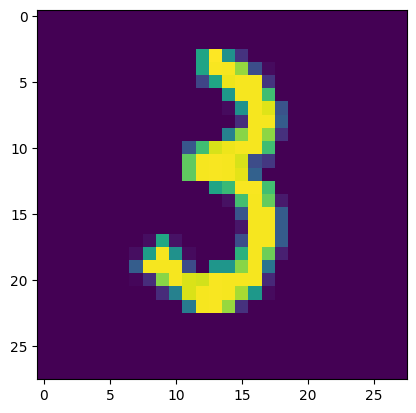

Label of ground-truth:  3


In [3]:
# This code block displays a sample of training data.
# This is a GOOD PRACTICE to do when working with any dataset.
# Here, we will load the 1234th sample of the data. You can change this value as desired.
import matplotlib.pyplot as plt

sample_id = 1234
plt.imshow(x_train[sample_id])
plt.show()
print('Label of ground-truth: ', y_train[sample_id])

## 2. Data Preprocessing
Data normalization involves two main tasks:
* For the output `y`: converting it from label form to **one-hot encoding**.
* For the input `x`: normalizing the pixel values **from the range [0-255] to the range [0-1]**. This step significantly improves the training speed.

In [4]:
# This function is used to convert the output from label form to one-hot vector form.
def onehot(y):
	oh = np.zeros((y.shape[0], 10))
	for i in range(y.shape[0]):
		oh[i, int(y[i])]=1
	return oh

In [11]:
from sklearn import preprocessing
import numpy as np

# Convert from label form to one-hot encoding form
y_train_oh = onehot(y_train)
y_train_oh.shape

y_test_oh = onehot(y_test)
y_test_oh.shape

# Normalize the input images to the range [0-1]
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [12]:
# You can view the data before and after preprocessing.
# You can change the `sample_id` to any desired number.
sample_id = 4321

print("`y` BEFORE transformation:", y_train[sample_id])
print("`y` AFTER transformation:", y_train_oh[sample_id])

`y` BEFORE transformation: 0
`y` AFTER transformation: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
print("`x` BEFORE transformation:", x_train[sample_id])
print("`x` AFTER transformation:", x_train_norm[sample_id])

`x` BEFORE transformation: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   48 191 255 203   7   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7  57
  172 252 247 196  43   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 252
  252 252  50   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 201 253 252
  252 202  51   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0

## 3. Implementing the CNN model with the LeNet architecture

Importing the Keras Libraries

First, we need to import the necessary libraries, modules, and functions from Keras:
- `Input`: Used to receive input data for the model.
- `Conv2D`: Performs Convolutional transformation with activation.
- `AveragePooling2D`: Reduces the feature size.
- `Dense`: Also known as the Fully Connected layer, an essential component of Neural Network models.
- `Model`: A class object used to package the input and output layers, train the model using the `fit` method, and make predictions using the `predict` method.
- `load_model`: A function used to load a model from a file.

In [14]:
from keras.layers import Input, Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import load_model, Model
import keras

In [15]:
class LeNetCNN:
	# constructor
	def __init__(self):
		self.model = None

	# Define structure of the CNN
	def build(self, input_dim):
		input = Input(shape = input_dim) # input

		# Extract features
		C1 = Conv2D(6, (3, 3), padding='same', activation='sigmoid')(input)
		S2 = AveragePooling2D(pool_size=(2, 2), padding="same")(C1)
		C3 = Conv2D(16, (3, 3), padding='same', activation='sigmoid')(S2)
		S4 = AveragePooling2D(pool_size=(2, 2), padding="same")(C3)
		# Convert from a tensor to a vector
		flat = Flatten()(S4)
		# Classify features
		F5 = Dense(120, activation='sigmoid', use_bias=True)(flat)
		F6 = Dense(84, activation='sigmoid', use_bias=True)(F5)
		output = Dense(10, activation='softmax', use_bias=True)(F6) # y~ output

		self.model = Model(input, output)

	# Train model
	def train(self, x_train, y_train): # x_train is X, y_train is ground-truth
		adam = keras.optimizers.Adam(learning_rate=0.01)
		self.model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics=['accuracy'])
		self.model.fit(x_train, y_train, epochs = 10, batch_size = 128)

	# Load model from file
	def load(self, model_file):
		self.model = load_model(model_file)

	# Save model to file
	def save(self, model_file):
		self.model.save(model_file)

	# Summary the architecture
	def summary(self):
		self.model.summary()

	# Experiment with the model using image data as input
	def predict(self, x_test):
		return self.model.predict(x_test)

	# Evaluate the model performance of the testing set
	def predict_and_eval(self, x_test_norm, y_test):
		# Predict on the testing set
		test_pred = self.model.predict(x_test_norm)

		# Calculate the accuracy of the testing set
		accuracy = tf.keras.metrics.Accuracy()
		labels_pred = [np.argmax(i) for i in test_pred]
		accuracy.update_state(labels_pred, y_test)
		print('Current accuracy: {}'.format(accuracy.result().numpy()*100))


In [16]:
# Set the random seed
fix_random_seed()

# Initialize the LeNet architecture
lenet = LeNetCNN()
# Build the LeNet architecture with the input shape is 28x28x1
lenet.build((28, 28, 1))
lenet.summary()
lenet.train(x_train_norm, y_train_oh)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 7, 7, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,154 (414.66 KB)

 Trainable params: 106,154 (414.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1028 - loss: 2.3190
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1064 - loss: 2.3047
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1068 - loss: 2.3040
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1068 - loss: 2.3040
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1069 - loss: 2.3040
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1069 - loss: 2.3040
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1068 - loss: 2.3040
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1070 - loss: 2.3040
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1070 - loss: 2.3040
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1071 - loss: 2.3040


With the network architecture above, observe and see if there is any information that you don't fully understand?

Key information to grasp:
- Layer names
- Layer sizes
- Number of parameters

Discuss with your friends/teachers whenever there are any unclear aspects regarding the parameters mentioned above.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


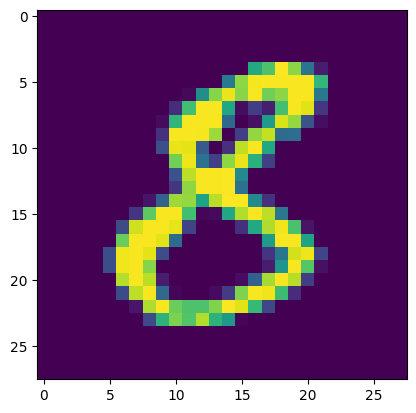

Prediction:  1
Ground-truth:  8


In [20]:
# Predict on the testing set
pred = lenet.predict(x_test_norm)
test_index = 1234
plt.imshow(x_test[test_index])
plt.show()
print('Prediction: ', np.argmax(pred[test_index]))
print('Ground-truth: ', y_test[test_index])

In [19]:
# Evaluate the model performance of the testing set
lenet.predict_and_eval(x_test_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Current accuracy: 11.349999904632568


## 4. Experimenting with some variations

### 4.1 Variant Alpha - Replacing sigmoid activation with ReLU

In this variant, we will replace the sigmoid activation function with the rectified linear unit (ReLU) activation function. ReLU is known for its ability to mitigate the vanishing gradient problem and accelerate convergence in deep neural networks.

In [21]:
class AlphaCNN(LeNetCNN):
	# Define structure of the CNN
	def build(self, input_dim):
		input = None
		output = None
		### YOUR CODE HERE
		input = Input(shape = input_dim)
		C1 = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
		S1 = AveragePooling2D(pool_size=(2, 2), padding="same")(C1)
		C3 = Conv2D(16, (3, 3), padding='same', activation='relu')(S1)
		S4 = AveragePooling2D(pool_size=(2, 2), padding="same")(C3)
		flat = Flatten()(S4)
		F5 = Dense(120, activation='relu', use_bias=True)(flat)
		F6 = Dense(84, activation='relu', use_bias=True)(F5)
		output = Dense(10, activation='softmax', use_bias=True)(F6)
		self.model = Model(input, output)


In [22]:
# Set the random seed
fix_random_seed()
#  Initialize the Alpha architecture
alpha = AlphaCNN()
# Build the Alpha architecture with the input shape is 28x28x1
alpha.build((28, 28, 1))
alpha.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 7, 7, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,154 (414.66 KB)

 Trainable params: 106,154 (414.66 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Verify the Alpha architecture

# Check if the number of layers remains unchanged
assert len(alpha.model.layers) == 9
# Check a number of layers in the Alpha network architecture
assert "keras.engine.input_layer.InputLayer" in str(type(alpha.model.layers[0]))
assert "keras.layers.convolutional.conv2d.Conv2D" in str(type(alpha.model.layers[1]))
assert "keras.layers.pooling.average_pooling2d.AveragePooling2D" in str(type(alpha.model.layers[2]))
assert "class 'keras.layers.core.dense.Dense" in str(type(alpha.model.layers[6]))
# Check the activation function of the convolutional layer
assert alpha.model.layers[1].activation(1.0).numpy() == 1.0
assert alpha.model.layers[1].activation(-1.0).numpy() == 0.0

AssertionError: 

In [24]:
# Test with the hidden test


In [25]:
# After ensuring that your architecture is stable, what are you waiting for? Let's start training!
alpha.train(x_train_norm, y_train_oh)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8830 - loss: 0.3666
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9806 - loss: 0.0613
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9860 - loss: 0.0469
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9882 - loss: 0.0388
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9889 - loss: 0.0355
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9907 - loss: 0.0306
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9916 - loss: 0.0273
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9921 - loss: 0.0276
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9924 - loss: 0.0267
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9931 - loss: 0.0240


In [26]:
# Evaluate the model performance on the testing set
alpha.predict_and_eval(x_test_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Current accuracy: 99.00000095367432


Between the LeNet and Alpha versions, do you think there is a significant difference in `ACCURACY` on the test set between these two models?

In [28]:
options = ['No opinion', 'LeNet is better than Alpha', 'LeNet is worse than Alpha', 'LeNet has competitive results with Alpha (with a difference of less than 1%)']
your_choice = None

# Please select your_choice as 0, 1, 2, or 3 corresponding to the options above
# YOUR CODE HERE
your_choice =2
print("My option: ", options[your_choice])

My option:  LeNet is worse than Alpha


In [ ]:
# Test with the hidden test

Based on the observed accuracy on the training set during the training process, in your opinion, which model demonstrates faster convergence speed (indicating a faster improvement in accuracy through each epoch)?

In [30]:
options = ['No opinion', 'LeNet converges faster than Alpha', 'LeNet converges slower than Alpha',
		   'LeNet converges at a similar speed as Alpha, with a difference in accuracy of less than 5%']
your_choice = None

# Please select your_choice as 0, 1, 2, or 3 corresponding to the options above
# YOUR CODE HERE
your_choice = 2
print("My option: ", options[your_choice])

My option:  LeNet converges slower than Alpha


In [ ]:
# Test with the hidden test


### 4.2. Beta Variant - Replace AveragePooling with MaxPooling
Note that the Beta variant is further developed from the Alpha variant, so the configuration related to the activation function still uses ReLU.

In [42]:
from keras.layers import MaxPooling2D

class BetaCNN(LeNetCNN):
	# Define structure of the CNN
	def build(self, input_dim):
		input = Input(shape=input_dim)
		C1 = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
		S1 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)
		C3 = Conv2D(16, (3, 3), padding='same', activation='relu')(S1)
		S4 = MaxPooling2D(pool_size=(2, 2), padding="same")(C3)
		flat = Flatten()(S4)
		F5 = Dense(120, activation='relu', use_bias=True)(flat)
		F6 = Dense(84, activation='relu', use_bias=True)(F5)
		output = Dense(10, activation='softmax', use_bias=True)(F6)
		self.model = Model(input, output)


In [43]:
# Set the random seed
fix_random_seed()

# Initialize the Beta architecture
beta = BetaCNN()
# Build the Beta architecture with the input shape is 28x28x1
beta.build((28, 28, 1))
beta.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,154 (414.66 KB)

 Trainable params: 106,154 (414.66 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Verify the Alpha architecture

# Check if the number of layers remains unchanged
assert len(beta.model.layers) == 9
# Check a number of layers in the Beta network architecture
assert "keras.engine.input_layer.InputLayer" in str(type(beta.model.layers[0]))
assert "keras.layers.convolutional.conv2d.Conv2D" in str(type(beta.model.layers[1]))
assert "keras.layers.pooling.max_pooling2d.MaxPooling2D" in str(type(beta.model.layers[2]))
assert "keras.layers.core.dense.Dense" in str(type(beta.model.layers[6]))
# Check the activation function of the convolutional layer
assert beta.model.layers[1].activation(1.0).numpy() == 1.0
assert beta.model.layers[1].activation(-1.0).numpy() == 0.0

AssertionError: 

In [ ]:
# Test with the hidden test

In [45]:
# Let's start training!
beta.train(x_train_norm, y_train_oh)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8901 - loss: 0.3364
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9801 - loss: 0.0680
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9844 - loss: 0.0545
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9849 - loss: 0.0522
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9875 - loss: 0.0438
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9868 - loss: 0.0444
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9899 - loss: 0.0378
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9903 - loss: 0.0338
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9891 - loss: 0.0397
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9900 - loss: 0.0381


In [40]:
# Evaluate the model performance on the testing set
beta.predict_and_eval(x_test_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Current accuracy: 98.36999773979187


According to you, do you see any significant changes between the Alpha and Beta versions?

In [46]:
options = ['No opinion', 'Alpha is better than Beta', 'Alpha is worse than Beta', 'Alpha has competitive results with Beta (with a difference of less than 1%)']
your_choice = 3

# Please select your_choice as 0, 1, 2, or 3 corresponding to the options above
# YOUR CODE HERE

print("My option: ", options[your_choice])

My option:  Alpha has competitive results with Beta (with a difference of less than 1%)


In [ ]:
#  Test with the hidden test

So, at this stage, you have successfully implemented the LeNet model in a modern approach, also known as the 2020 version of LeNet.

But let's not stop there; we will now try some more daring variations.

### 4.3 Gamma Variation - Removing all activation functions in the Beta variation
The Gamma variation is introduced due to the suspicion that activation functions are not truly beneficial in CNN network architectures. Please proceed with the implementation and evaluation of this hypothesis to determine its validity.

In [48]:
class GammaCNN(LeNetCNN):
  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape=input_dim)
    C1 = Conv2D(6, (3, 3), padding='same')(input)
    S1 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)
    C3 = Conv2D(16, (3, 3), padding='same')(S1)
    S4 = MaxPooling2D(pool_size=(2, 2), padding="same")(C3)
    flat = Flatten()(S4)
    F5 = Dense(120, use_bias=True)(flat)
    F6 = Dense(84, use_bias=True)(F5)
    output = Dense(10, use_bias=True)(F6)
    self.model = Model(input, output)


In [49]:
# Set the random seed
fix_random_seed()

# Initialize the Gamma architecture
gamma = GammaCNN()
# Build the Gamma architecture with the input shape is 28x28x1
gamma.build((28, 28, 1))
gamma.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,154 (414.66 KB)

 Trainable params: 106,154 (414.66 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Verify the Gamma architecture

# Check if the number of layers remains unchanged
assert len(gamma.model.layers) == 9
#  Check a number of layers in the Gamma network architecture
assert "keras.engine.input_layer.InputLayer" in str(type(gamma.model.layers[0]))
assert "keras.layers.convolutional.conv2d.Conv2D" in str(type(gamma.model.layers[1]))
assert "keras.layers.pooling.max_pooling2d.MaxPooling2D" in str(type(gamma.model.layers[2]))
assert "keras.layers.core.dense.Dense" in str(type(gamma.model.layers[6]))
# Check the activation function of the convolutional layer
assert gamma.model.layers[1].activation(1.0) == 1.0
assert gamma.model.layers[1].activation(-1.0) == -1.0

AssertionError: 

In [ ]:
# Test with the hidden test

In [51]:
# Train train train!
gamma.train(x_train_norm, y_train_oh)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0966 - loss: 7.0732
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0975 - loss: 4.9994
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0975 - loss: 4.9994
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0975 - loss: 4.9994
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0975 - loss: 4.9994
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0975 - loss: 4.9994
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0975 - loss: 4.9994
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0975 - loss: 4.9994
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0975 - loss: 4.9994
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0975 - loss: 4.9994


In [52]:
# Evaluate the model performance on the testing set
gamma.predict_and_eval(x_test_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Current accuracy: 9.82000008225441


According to you, do you observe any significant changes between the Beta and Gamma versions in terms of results?

In [53]:
options = ['No opinion', 'Beta is better than Gamma', 'Beta is worse than Gamma', 'Beta has competitive results with Gamma (with a difference of less than 1%)']
your_choice = 1

# Please select your_choice as 0, 1, 2, or 3 corresponding to the options above
# YOUR CODE HERE

print("My option: ", options[your_choice])

My option:  Beta is better than Gamma


In [ ]:
# Test with the hidden test

### 4.4 Omicron Variation - Removing all pooling layers in the Beta variation
The Omicron variation is introduced due to the suspicion that the MaxPooling step is not truly beneficial in CNN network architectures. Please proceed with the implementation and evaluation of this hypothesis to determine its validity.

In [54]:
class OmicronCNN(LeNetCNN):
  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape=input_dim)
    C1 = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
    C3 = Conv2D(16, (3, 3), padding='same', activation='relu')(C1)
    flat = Flatten()(C3)
    F5 = Dense(120, activation='relu', use_bias=True)(flat)
    F6 = Dense(84, activation='relu', use_bias=True)(F5)
    output = Dense(10, activation='softmax', use_bias=True)(F6)
    self.model = Model(input, output)

In [55]:
# Set the random seed
fix_random_seed()

# Initialize the Omicron architecture
omicron = OmicronCNN()
# Build the Omicron architecture with the input shape is 28x28x1
omicron.build((28, 28, 1))
omicron.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 120)            │     1,505,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,517,354 (5.79 MB)

 Trainable params: 1,517,354 (5.79 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Verify the Omicron architecture

# Check if the number of layers remains unchanged
assert len(omicron.model.layers) == 7
# Check a number of layers in the Omicron network architecture
assert "keras.engine.input_layer.InputLayer" in str(type(omicron.model.layers[0]))
assert "keras.layers.convolutional.conv2d.Conv2D" in str(type(omicron.model.layers[1]))
assert "keras.layers.convolutional.conv2d.Conv2D" in str(type(omicron.model.layers[2]))
assert "keras.layers.core.dense.Dense" in str(type(omicron.model.layers[6]))
# Check the activation function of the convolutional layer
assert beta.model.layers[1].activation(1.0).numpy() == 1.0
assert beta.model.layers[1].activation(-1.0).numpy() == 0.0

AssertionError: 

In [ ]:
# Test with the hidden test

In [57]:
# Train train train!
omicron.train(x_train_norm, y_train_oh)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8324 - loss: 0.5659
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9783 - loss: 0.0719
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9855 - loss: 0.0487
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9847 - loss: 0.0484
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9866 - loss: 0.0442
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9907 - loss: 0.0336
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9909 - loss: 0.0322
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9924 - loss: 0.0261
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9926 - loss: 0.0280
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9932 - loss: 0.0266


In [58]:
# Evaluate the model performance on the testing set
omicron.predict_and_eval(x_test_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Current accuracy: 97.97000288963318


According to you, do you observe any significant changes between the Beta and Omicron versions in terms of results?

In [ ]:
options = ['No opinion', 'Beta is better than Omicron', 'Beta is worse than Omicron', 'Beta has competitive results with Omicron (with a difference of less than 1%)']
your_choice = 3

# Please select your_choice as 0, 1, 2, or 3 corresponding to the options above
# YOUR CODE HERE

print("My option: ", options[your_choice])

My option:  Beta has competitive results with Omicron (with a difference of less than 1%)


In [ ]:
# Test with the hidden test


In addition, do you have any comments on the number of parameters and training time of the Omicron model?

In [59]:
options = ['Omicron has fewer parameters than Beta', 'Omicron has more parameters than Beta', 'Omicron has the same number of parameters as Beta',
		   'Omicron trains faster than Beta', 'Omicron trains slower than Beta', 'Omicron trains comparable to Beta (within 10 seconds)']

your_choices = [1, 4]

# Please select your_choice with a set of values from 0, 1, 2, 3, 4, 5 corresponding to the options given above.
# Note: You can choose 0, 1, or more than 1 option in this question.
# YOUR CODE HERE

print("My options: ")
for op in your_choices:
	print('   - ', options[op])

My options: 
   -  Omicron has more parameters than Beta
   -  Omicron trains slower than Beta


In [ ]:
# Test with the hidden test

### 4.5 Delta Variant - Removing all Convolutional Layers in the Beta Variant
The **Delta** variant emerged due to doubts about the usefulness of the Convolutional Step!!!?? in CNN network architecture. Please try implementing and evaluating to see if this hypothesis is correct.

This variant is risky as it completely changes the architecture of the CNN network. According to you, what is the essence of this Beta variant model?

In [61]:
class DeltaCNN(LeNetCNN):
  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape=input_dim)
    S1 = MaxPooling2D(pool_size=(2, 2), padding="same")(input)
    S4 = MaxPooling2D(pool_size=(2, 2), padding="same")(S1)
    flat = Flatten()(S4)
    F5 = Dense(120, activation='relu', use_bias=True)(flat)
    F6 = Dense(84, activation='relu', use_bias=True)(F5)
    output = Dense(10, activation='softmax', use_bias=True)(F6)
    self.model = Model(input, output)

In [62]:
# Set the random seed
fix_random_seed()

# Initialize the Delta architecture
delta = DeltaCNN()
# Build the Delta architecture with the input shape is 28x28x1
delta.build((28, 28, 1))
delta.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 120)            │         6,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,014 (66.46 KB)

 Trainable params: 17,014 (66.46 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Verify the Delta architecture

# Check if the number of layers remains unchanged
assert len(delta.model.layers) == 7
# Check a number of layers in the Delta network architecture
assert "keras.engine.input_layer.InputLayer" in str(type(delta.model.layers[0]))
assert "keras.layers.pooling.max_pooling2d.MaxPooling2D" in str(type(delta.model.layers[1]))
assert "keras.layers.pooling.max_pooling2d.MaxPooling2D" in str(type(delta.model.layers[2]))
assert "keras.layers.core.dense.Dense" in str(type(delta.model.layers[6]))
# Check the activation function of the convolutional layer
assert delta.model.layers[1].pool_size  == (2, 2)

AssertionError: 

In [ ]:
# Test with the hidden test

In [64]:
# Let's start training!
delta.train(x_train_norm, y_train_oh)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7762 - loss: 0.6761
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8774 - loss: 0.3702
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8869 - loss: 0.3392
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8938 - loss: 0.3185
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8973 - loss: 0.3064
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9019 - loss: 0.2968
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9039 - loss: 0.2875
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9071 - loss: 0.2783
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9084 - loss: 0.2770
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9116 - loss: 0.2659


In [65]:
#  Evaluate the model performance on the testing set
delta.predict_and_eval(x_test_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Current accuracy: 89.21999931335449


According to you, do you observe any significant changes between the Delta and Beta versions in terms of results?

In [66]:
options = ['No opinion', 'Beta is better than Delta', 'Beta is worse than Delta', 'Beta has competitive results with Delta (with a difference of less than 1%)']
your_choice = 1

# Please select your_choice as 0, 1, 2, or 3 corresponding to the options above
# YOUR CODE HERE

print("My option:", options[your_choice])

My option: Beta is better than Delta


In [ ]:
# Test with the hidden test

In addition, do you have any comments on the number of parameters and training time of the Omicron model?

In [67]:
options = ['Delta has fewer parameters than Beta', 'Delta has more parameters than Beta', 'Delta has the same number of parameters as Beta',
		   'Delta trains faster than Beta', 'Delta trains slower than Beta', 'Delta trains comparable to Beta']
your_choices = [0, 3]

# Please select your_choice with a set of values from 0, 1, 2, 3, 4, 5 corresponding to the options given above.
# Note: You can choose 0, 1, or more than 1 option in this question.
# YOUR CODE HERE

print("My options: ")
for op in your_choices:
	print('   - ', options[op])

My options: 
   -  Delta has fewer parameters than Beta
   -  Delta trains faster than Beta


In [ ]:
# Test with the hidden test

Phew!! So you have experienced the feeling of designing and editing the architecture of a CNN network. Each module has a specific function. I hope you have appreciated the significance of each module and its role in the overall design of the CNN network.